In [55]:
# import libraries 
library(ggplot2)
library(tidyverse)
library(ggfortify)
library(ggrepel)
library(factoextra)
library(FactoMineR)
library(car)
library(FSA)
library(ggforce)

In [2]:
# > DATAFRAMES < #

# load dataset
sharks = read.table("datasets/shark_immunity.txt", header = TRUE, sep = "\t")

# change the order the physiological conditions are displayed 
sharks$physiological_condition <- factor(
  sharks$physiological_condition,
  levels = c("Healthy", "Stressed", "Injured", "Infected", "Recovering")
)
# reduces name to just the gene
names(sharks) <- sub("_expression", "", names(sharks))

# dataframe with gene expression split into 2 variables
sharks_genes = sharks %>% 
    pivot_longer(
        cols = starts_with("Gene_"),
        names_to = "gene",
        values_to = "expression"
    )

# dataframe where all numerical variables are split into 2 variables
sharks_super_long <- sharks %>%
  select(physiological_condition, immune_cell_type, Gene_A, Gene_B, Gene_C, Gene_D, Gene_E, Gene_F, regeneration_capacity, age_years, immune_receptor_diversity, response_to_infection, weight_kg, inflammation_level, resilience_score, reproduction_rate) %>% 
  pivot_longer(cols = -c("physiological_condition","immune_cell_type","Gene_A","Gene_B","Gene_C","Gene_D","Gene_E","Gene_F"), names_to = "variable", values_to = "value") %>%
    select(physiological_condition, immune_cell_type, Gene_A, Gene_B, Gene_C, Gene_D, Gene_E, Gene_F,variable,value) %>% 
    pivot_longer(cols = -c("physiological_condition", "immune_cell_type","variable","value"), names_to = "gene", values_to = "expression")

In [3]:
# > DATA SELECTION FUNCTIONS < #
condition_data = function(data, condition) {
    data[data$physiological_condition==condition, ]
}

cell_data = function(data, cell_type) {
    data[data$immune_cell_type==cell_type, ]
}

Warning message:
"The shape palette can deal with a maximum of 6 discrete values because more
than 6 becomes difficult to discriminate
i you have requested 30 values. Consider specifying shapes manually if you need
  that many of them."
Warning message:
"Removed 1013 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 24 rows containing missing values or values outside the scale range
(`geom_point()`)."


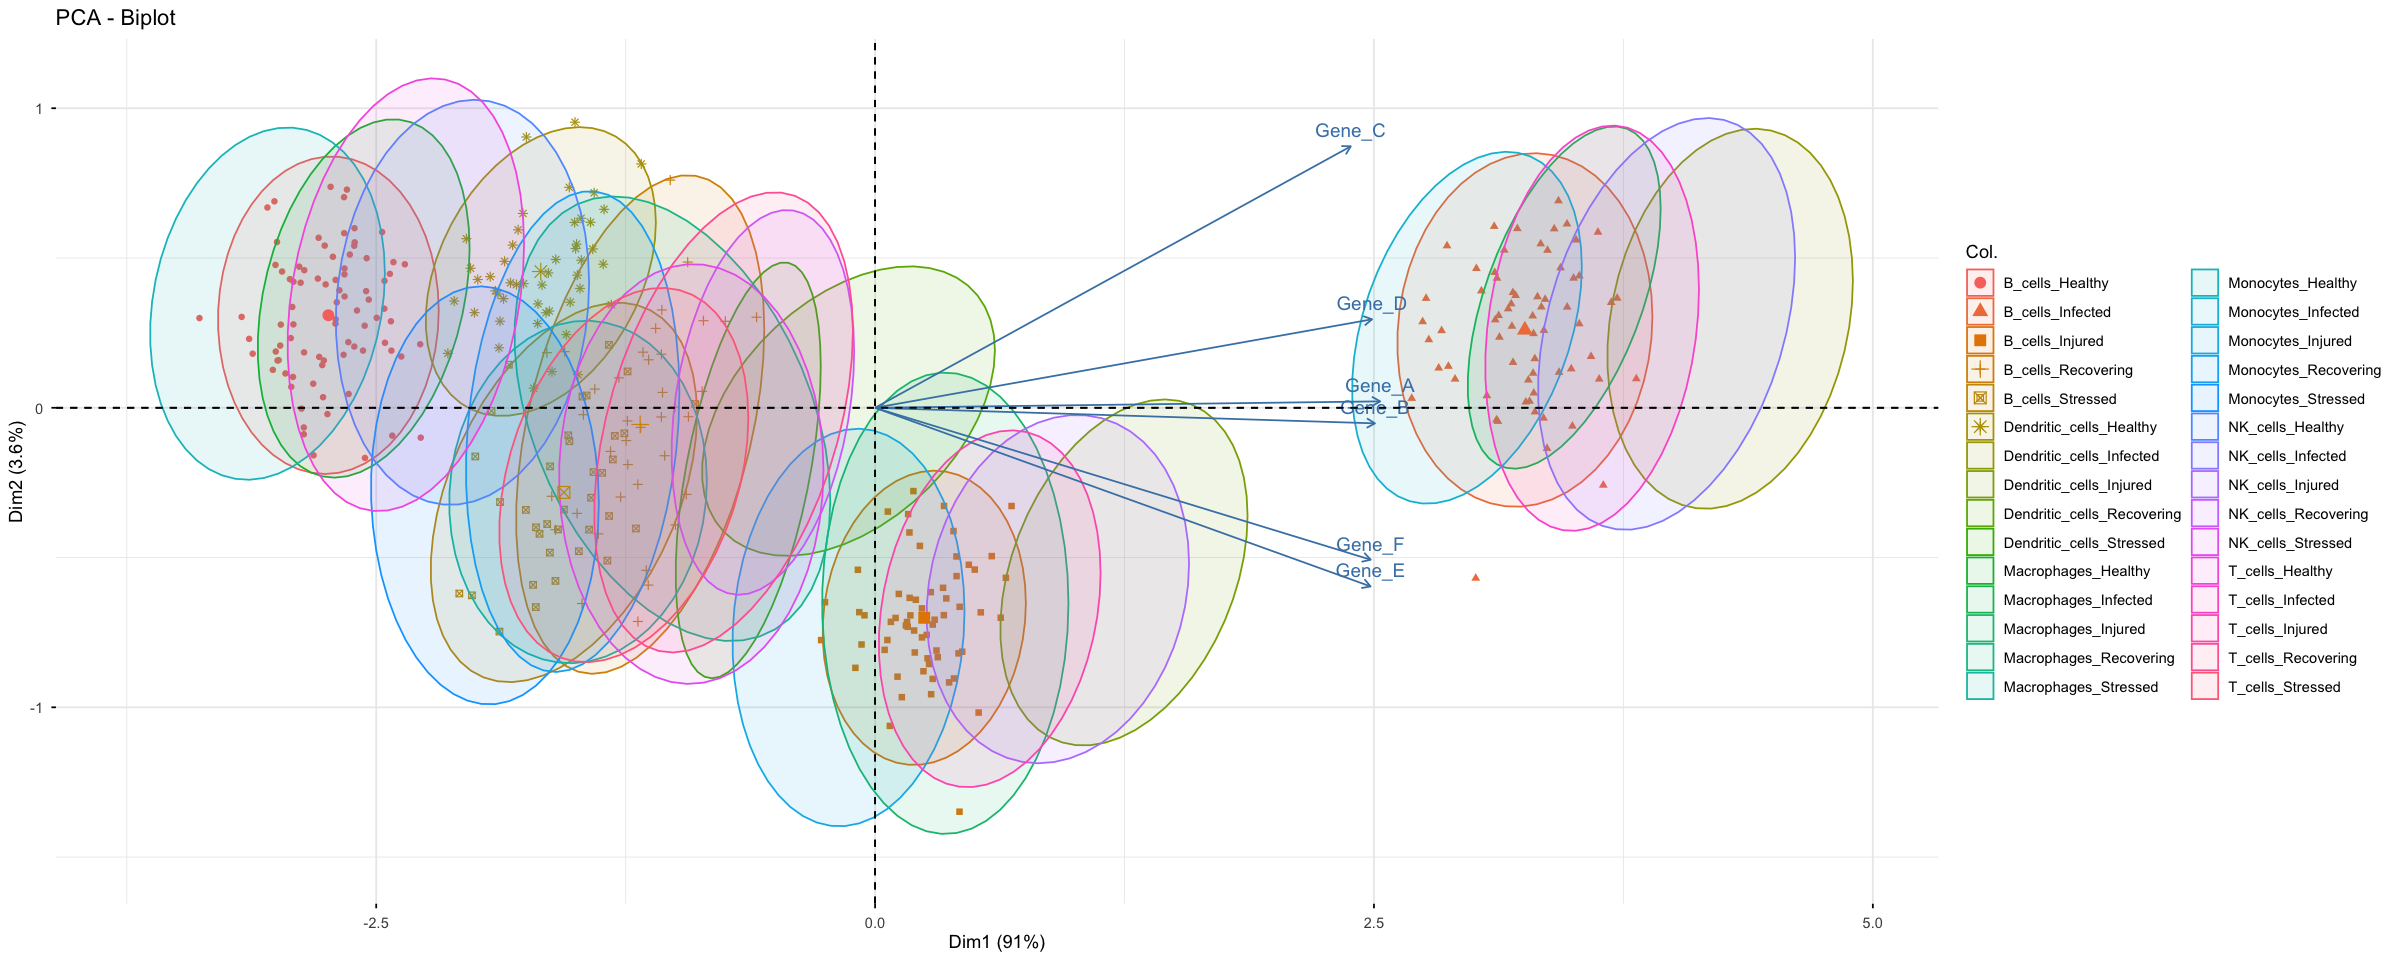

In [52]:
sharks$group = paste(sharks$immune_cell_type, sharks$physiological_condition, sep="_")
all_pca = PCA(sharks[, 4:9], scale.unit=TRUE, graph=FALSE)

options(repr.plot.width=20, repr.plot.height=8)
fviz_pca_biplot(all_pca, geom.ind="point", col.ind=sharks$group, col.quanti.sup=sharks$immune_cell_type, addEllipses=TRUE)

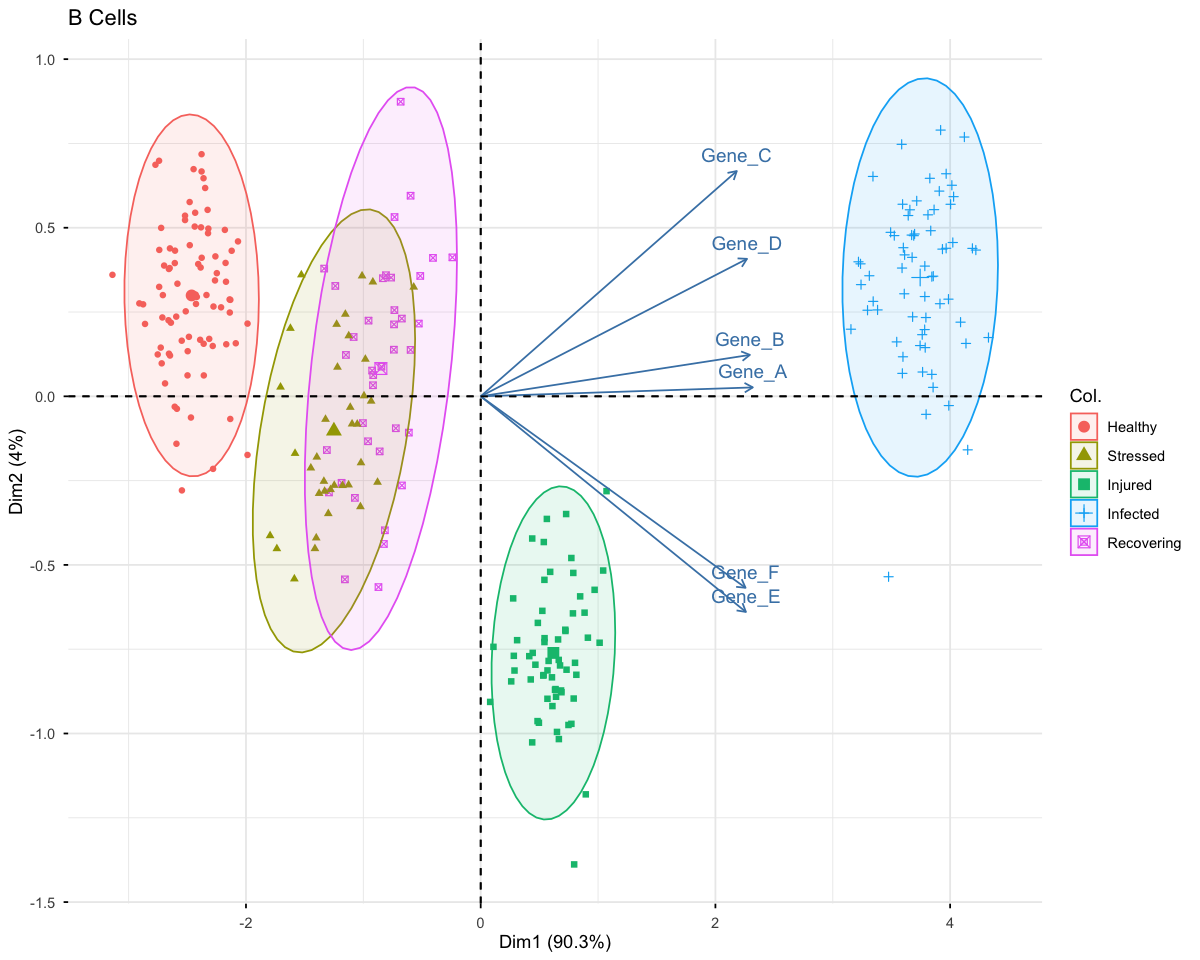

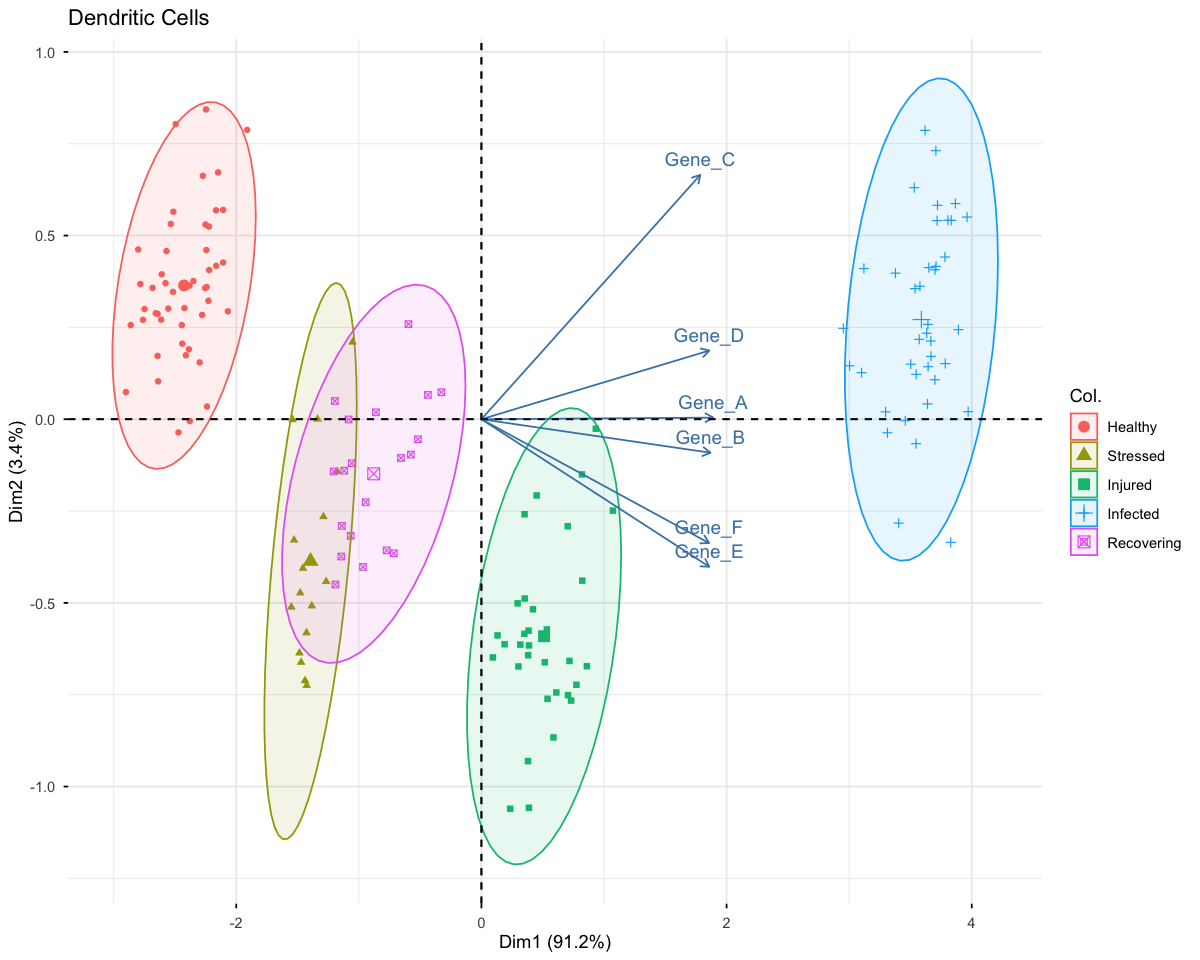

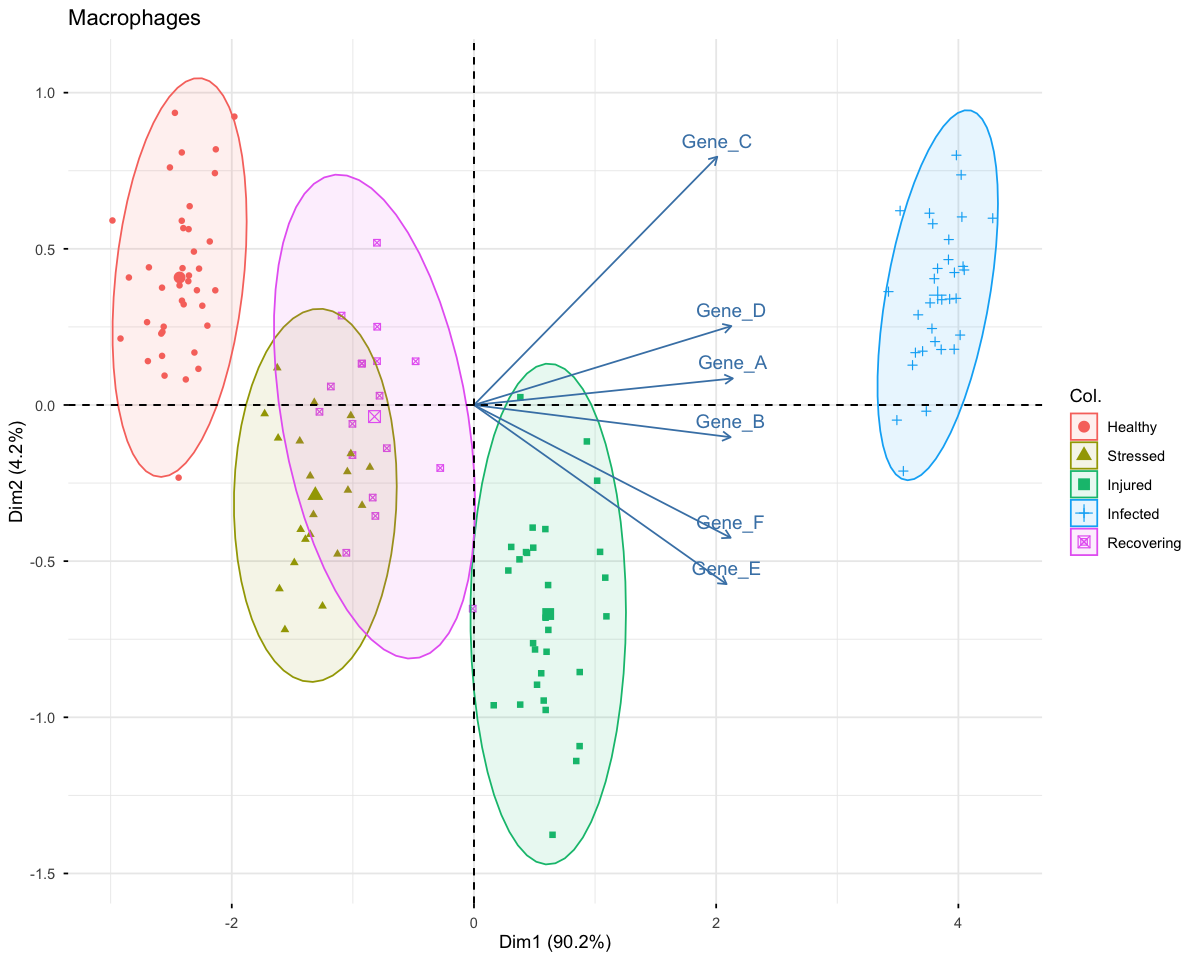

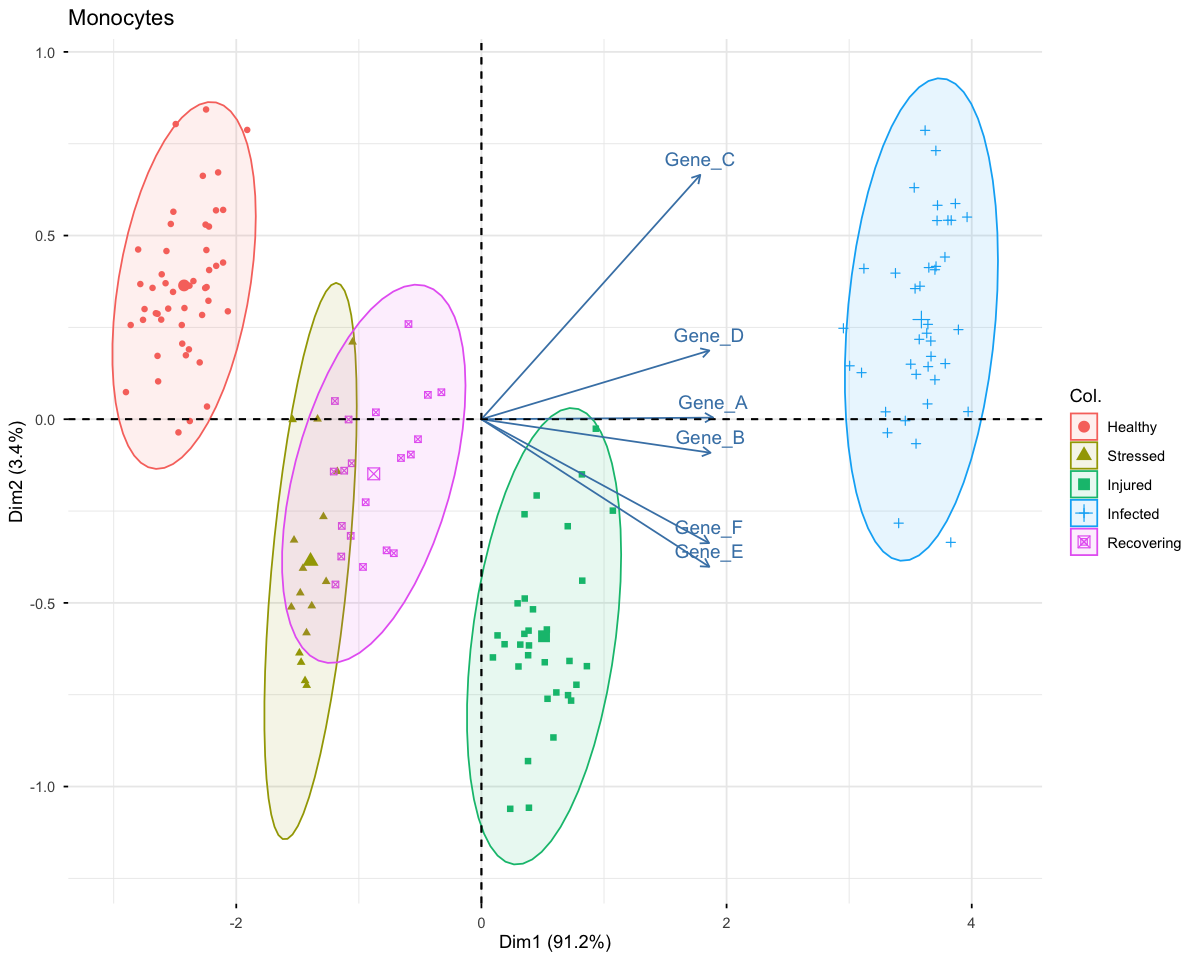

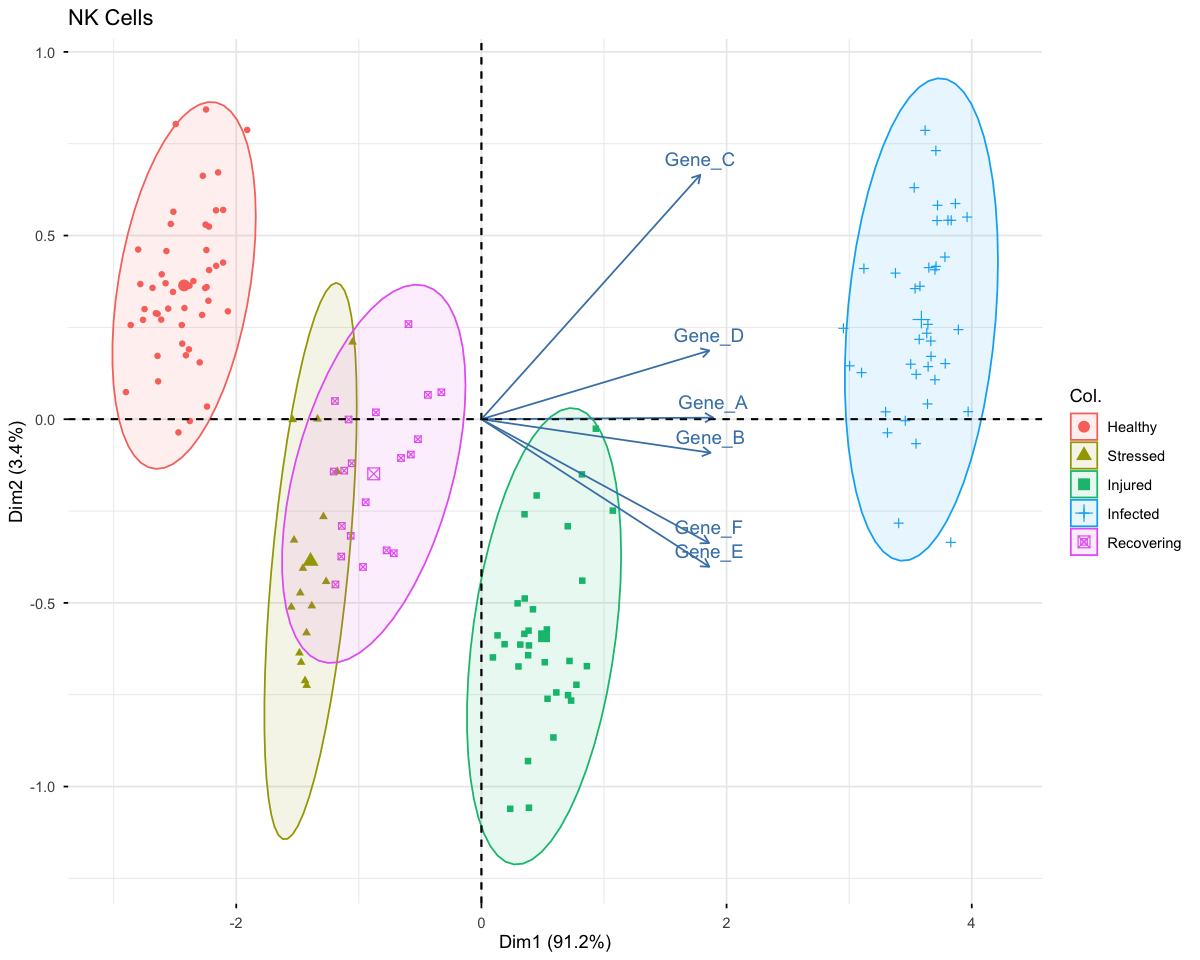

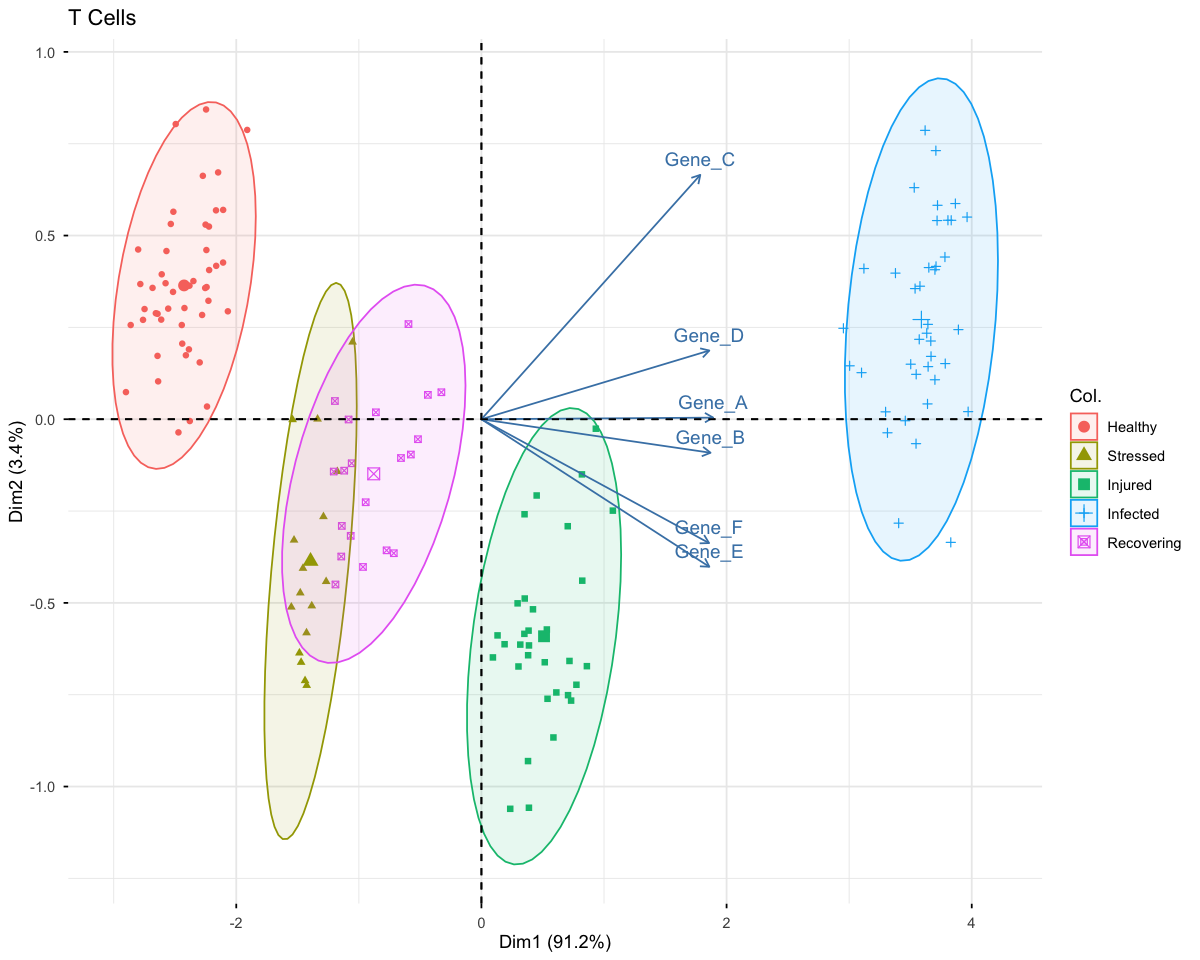

In [32]:
options(repr.plot.width=10, repr.plot.height=8)

BC = cell_data(sharks, "B_cells")
BC_pca = PCA(BC[, 4:9], scale.unit=TRUE, graph=FALSE)
fviz_pca_biplot(b_pca, geom.ind="point", col.ind=BC$physiological_condition, addEllipses=TRUE, title="B Cells")

DC = cell_data(sharks, "Dendritic_cells")
DC_pca = PCA(DC[, 4:9], scale.unit=TRUE, graph=FALSE)
fviz_pca_biplot(DC_pca, geom.ind="point", col.ind=DC$physiological_condition, addEllipses=TRUE, title="Dendritic Cells")

macro = cell_data(sharks, "Macrophages")
macro_pca = PCA(macro[, 4:9], scale.unit=TRUE, graph=FALSE)
fviz_pca_biplot(macro_pca, geom.ind="point", col.ind=macro$physiological_condition, addEllipses=TRUE, title="Macrophages")

mono = cell_data(sharks, "Dendritic_cells")
mono_pca = PCA(mono[, 4:9], scale.unit=TRUE, graph=FALSE)
fviz_pca_biplot(mono_pca, geom.ind="point", col.ind=mono$physiological_condition, addEllipses=TRUE, title="Monocytes")

NK = cell_data(sharks, "Dendritic_cells")
NK_pca = PCA(NK[, 4:9], scale.unit=TRUE, graph=FALSE)
fviz_pca_biplot(NK_pca, geom.ind="point", col.ind=NK$physiological_condition, addEllipses=TRUE, title="NK Cells")

TC = cell_data(sharks, "Dendritic_cells")
TC_pca = PCA(TC[, 4:9], scale.unit=TRUE, graph=FALSE)
fviz_pca_biplot(TC_pca, geom.ind="point", col.ind=TC$physiological_condition, addEllipses=TRUE, title="T Cells")


Injured cell populations correlated with Genes E and F -- matches significantly elevated expressions of E and F. 

Interestingly, infected cell populations seem to to correlate with genes A, B, C, and D, the other hypothetical functional group... and are healthy cell populations have a similar correlation to the ABCD functional group as the infected cell population?

# don't do genes -- ทำไม่จำไม่ได้ ??

## What is the difference in immune response levels across different immune cell types in infected sharks? // Do sharks possess specific immune cells that make them more resistant to infection?

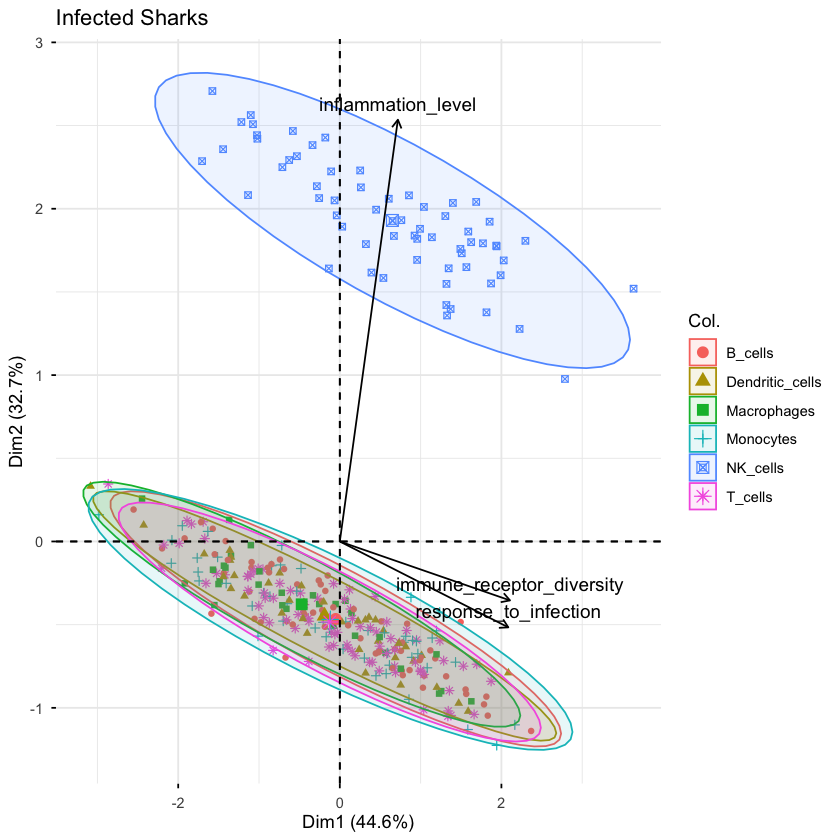

In [6]:
# infected sharks only
infected_sharks = condition_data(sharks, "Infected")

# PCA on infected sharks only
infect_pca <- PCA(infected_sharks[c("response_to_infection", "inflammation_level", "immune_receptor_diversity")], scale.unit = TRUE, graph = FALSE)

# MDS cloud plot with correlation circle
fviz_pca_biplot(infect_pca, geom.ind="point", col.ind=infected_sharks$immune_cell_type, col.var="black", addEllipses=TRUE, title="Infected Sharks") 

### Response to Infection (Infected)

In [ ]:
infected_sharks %>%
    group_by(immune_cell_type) %>%
    summarise(p_value = shapiro.test(response_to_infection)$p.value)

immune_cell_type p_value   
1 B_cells          0.92177458
2 Dendritic_cells  0.30026314
3 Macrophages      0.26508931
4 Monocytes        0.71007378
5 NK_cells         0.09840406
6 T_cells          0.44740274

Data is normally distributed.

In [ ]:
leveneTest(data=infected_sharks, response_to_infection ~ immune_cell_type)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


Df  F value  Pr(>F)   
group   5 1.603929 0.1585049
      327       NA        NA

All groups have similar variance.

In [ ]:
summary(aov(data=condition_data(sharks,"Infected"), response_to_infection ~ immune_cell_type))

                  Df Sum Sq Mean Sq F value Pr(>F)
immune_cell_type   5    420   84.01   0.684  0.636
Residuals        327  40153  122.79               

There is no significant different in the response to infection levels across immune cell types in the infected condition.

### Inflammation Level / Response to Infection / Immune Receptor Diversity (Infected)

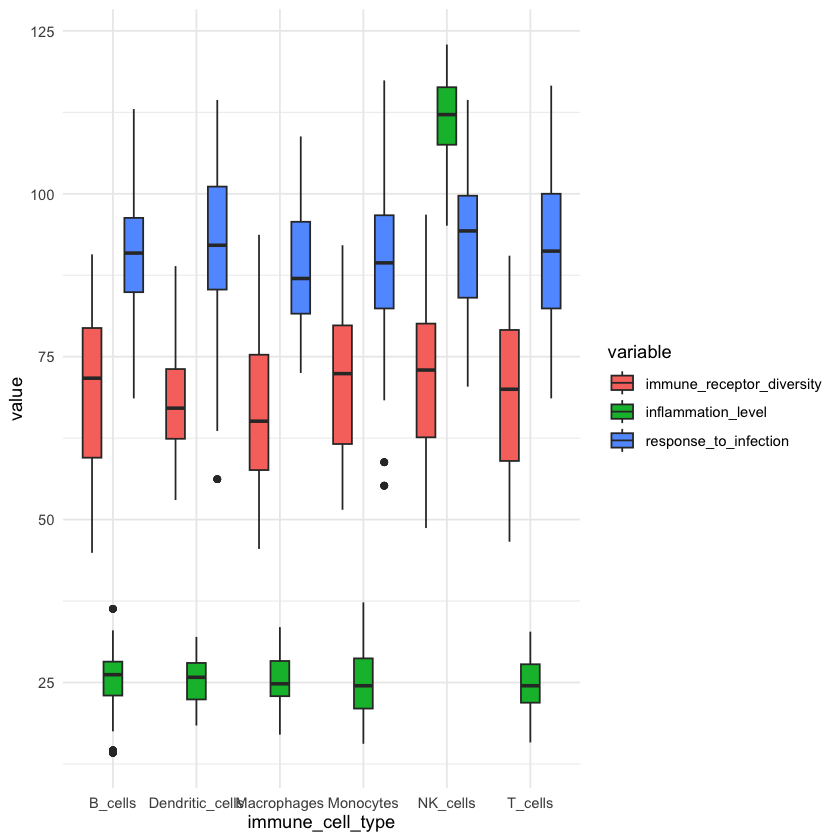

In [ ]:
infect_immune = condition_data(sharks_super_long, "Infected") %>%
    filter(variable %in% c("inflammation_level", "immune_receptor_diversity", "response_to_infection"))

ggplot(infect_immune, aes(x=immune_cell_type, y=value, fill=variable)) +
    geom_boxplot() +
    theme_minimal()

#### Inflammation Level

In [ ]:
infect_immune_anova = aov(data=condition_data(sharks,"Infected"), inflammation_level ~ immune_cell_type)
summary(infect_immune_anova)
TukeyHSD(infect_immune_anova)

                  Df Sum Sq Mean Sq F value Pr(>F)    
immune_cell_type   5 384681   76936    3356 <2e-16 ***
Residuals        327   7496      23                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = inflammation_level ~ immune_cell_type, data = condition_data(sharks, "Infected"))

$immune_cell_type
                                   diff        lwr        upr     p adj
Dendritic_cells-B_cells      -0.2538462  -3.033863   2.526171 0.9998325
Macrophages-B_cells          -0.3650124  -3.360847   2.630823 0.9993125
Monocytes-B_cells            -0.8819005  -3.449380   1.685579 0.9226229
NK_cells-B_cells             85.6550481  83.238096  88.072000 0.0000000
T_cells-B_cells              -1.1399444  -3.413235   1.133346 0.7040558
Macrophages-Dendritic_cells  -0.1111663  -3.413764   3.191431 0.9999988
Monocytes-Dendritic_cells    -0.6280543  -3.547656   2.291548 0.9897766
NK_cells-Dendritic_cells     85.9088942  83.120744  88.697044 0.0000000
T_cells-Dendritic_cells      -0.8860982  -3.550676   1.778479 0.9320515
Monocytes-Macrophages        -0.5168880  -3.642685   2.608909 0.9970101
NK_cells-Mac

NK cells significantly differ from other cell types by their high inflammation levels.

#### Response to Infection, Immune Receptor Diversity

In [ ]:
summary(aov(data=condition_data(sharks,"Infected"), response_to_infection ~ immune_cell_type))
summary(aov(data=condition_data(sharks,"Infected"), immune_receptor_diversity ~ immune_cell_type))

                  Df Sum Sq Mean Sq F value Pr(>F)
immune_cell_type   5    420   84.01   0.684  0.636
Residuals        327  40153  122.79               

                  Df Sum Sq Mean Sq F value Pr(>F)
immune_cell_type   5    780   156.0   1.217  0.301
Residuals        327  41930   128.2               

In terms of response to infection and immune receptor diversity, all cell types have similar profiles.

## [IGNORE] Injured : Genes E + F

### Is the difference between genes E and F's expression levels significantly higher than other genes in the injured condition?

#### probably the correct one but oh well

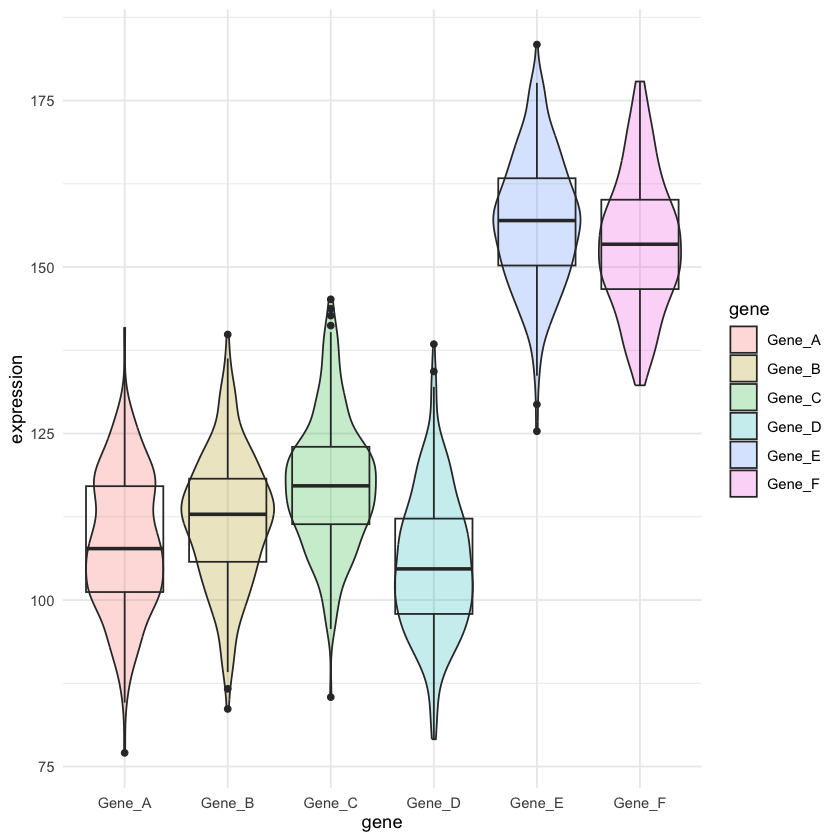

In [ ]:
injured_genes = sharks_genes[sharks_genes$physiological_condition=="Injured", ]

ggplot(injured_genes, aes(x=gene, y=expression, fill=gene)) +
    geom_violin(alpha=0.25) +
    geom_boxplot(fill=NA) +
    theme_minimal()

In [ ]:
injured_genes %>%
    group_by(gene) %>%
    summarise(p_value = shapiro.test(expression)$p.value)

gene   p_value   
1 Gene_A 0.13715658
2 Gene_B 0.78263937
3 Gene_C 0.11543153
4 Gene_D 0.25938731
5 Gene_E 0.91053059
6 Gene_F 0.05008131

Data is normally distributed.

In [ ]:
leveneTest(data=injured_genes, expression ~ gene)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


Df   F value   Pr(>F)   
group    5 0.7460175 0.5890175
      1620        NA        NA

All groups have similar variance.

In [ ]:
injured_genes_anova = aov(data=injured_genes, expression ~ gene)
summary(injured_genes_anova)
TukeyHSD(injured_genes_anova)

              Df Sum Sq Mean Sq F value Pr(>F)    
gene           5 731810  146362    1460 <2e-16 ***
Residuals   1620 162415     100                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = expression ~ gene, data = injured_genes)

$gene
                    diff        lwr        upr     p adj
Gene_B-Gene_A   3.514827   1.060647  5.9690079 0.0006542
Gene_C-Gene_A   8.951908   6.497728 11.4060885 0.0000000
Gene_D-Gene_A  -3.088893  -5.543074 -0.6347127 0.0045693
Gene_E-Gene_A  48.146995  45.692814 50.6011751 0.0000000
Gene_F-Gene_A  45.127531  42.673351 47.5817118 0.0000000
Gene_C-Gene_B   5.437081   2.982900  7.8912610 0.0000000
Gene_D-Gene_B  -6.603721  -9.057901 -4.1495401 0.0000000
Gene_E-Gene_B  44.632167  42.177987 47.0863477 0.0000000
Gene_F-Gene_B  41.612704  39.158523 44.0668843 0.0000000
Gene_D-Gene_C -12.040801 -14.494982 -9.5866207 0.0000000
Gene_E-Gene_C  39.195087  36.740906 41.6492671 0.0000000
Gene_F-Gene_C  36.175623  33.721443 38.6298037 0.0000000
Gene_E-Gene_D  51.235888  48.781707 53.6900682 0.0000000
Gene_F-Gene_D  48.216424  45.762244 50.6706049 0.0000000
Ge

So... expression levels between all genes are signficantly different?

#### overthinking getting the better of me; off yourself

(idea was that I wanted to see if the Genes E and F were one function group while Genes A, B, C, and D were another...)

In [ ]:
injured_genes %>%
    group_by(gene) %>%
    summarise(mean_expr = mean(expression), sd = sd(expression))

injured_genes$group <- ifelse(injured_genes$gene %in% c("Gene_E","Gene_F"), "High_Genes","Other_Genes")

wilcox.test(expression ~ group, data = injured_genes)

gene   mean_expr sd       
1 Gene_A 108.5478  10.236148
2 Gene_B 112.0626   9.849233
3 Gene_C 117.4997   9.944967
4 Gene_D 105.4589  10.332197
5 Gene_E 156.6948   9.689445
6 Gene_F 153.6753  10.010383


	Wilcoxon rank sum test with continuity correction

data:  expression by group
W = 586744, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Genes E and F's expression levels are signficantly higher. 

So does the function group hypothesis hold? What do Genes E and F do?

Surely to figure that out, we need to compare how different metrics evolve across physiological conditions with gene E and F expression?

In [ ]:
EF = sharks_super_long %>%
    filter(gene %in% c("Gene_E", "Gene_F"))

## How do genes linked to immunity react in the case of injury or infection?

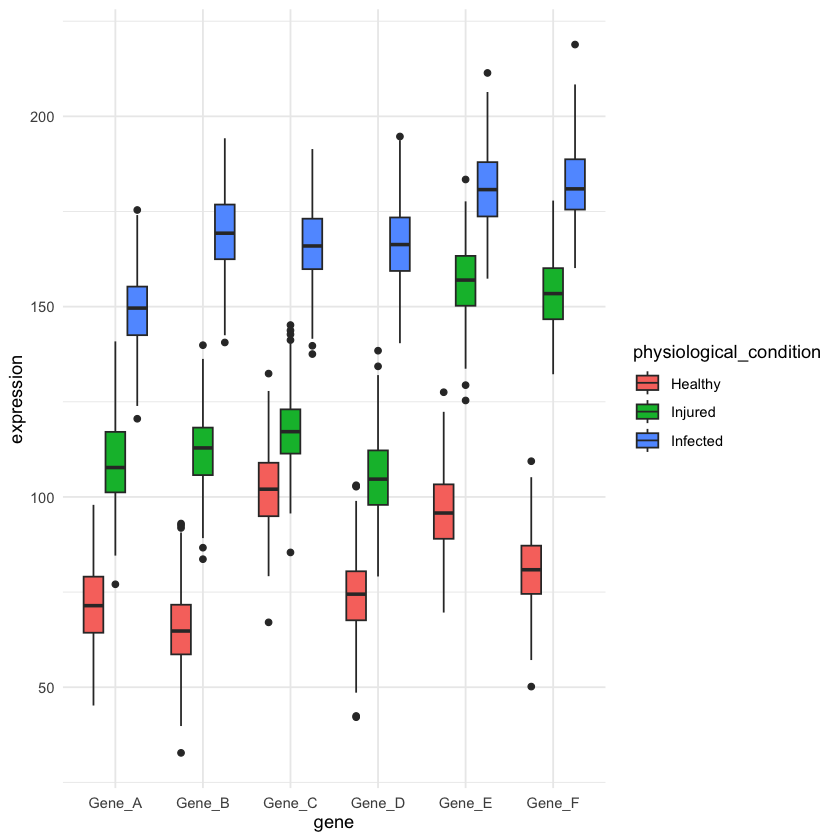

In [ ]:
aux_genes = sharks_genes %>%
    filter(physiological_condition %in% c("Healthy", "Injured", "Infected"))

ggplot(aux_genes, aes(x=gene, y=expression, fill=physiological_condition)) +
    geom_boxplot() +
    theme_minimal()

In [ ]:
aux_long = sharks_super_long %>%
    filter(physiological_condition %in% c("Healthy", "Injured", "Infected")) %>%
    filter(variable %in% c("inflammation_level", "response_to_infection", "immune_receptor_diversity"))

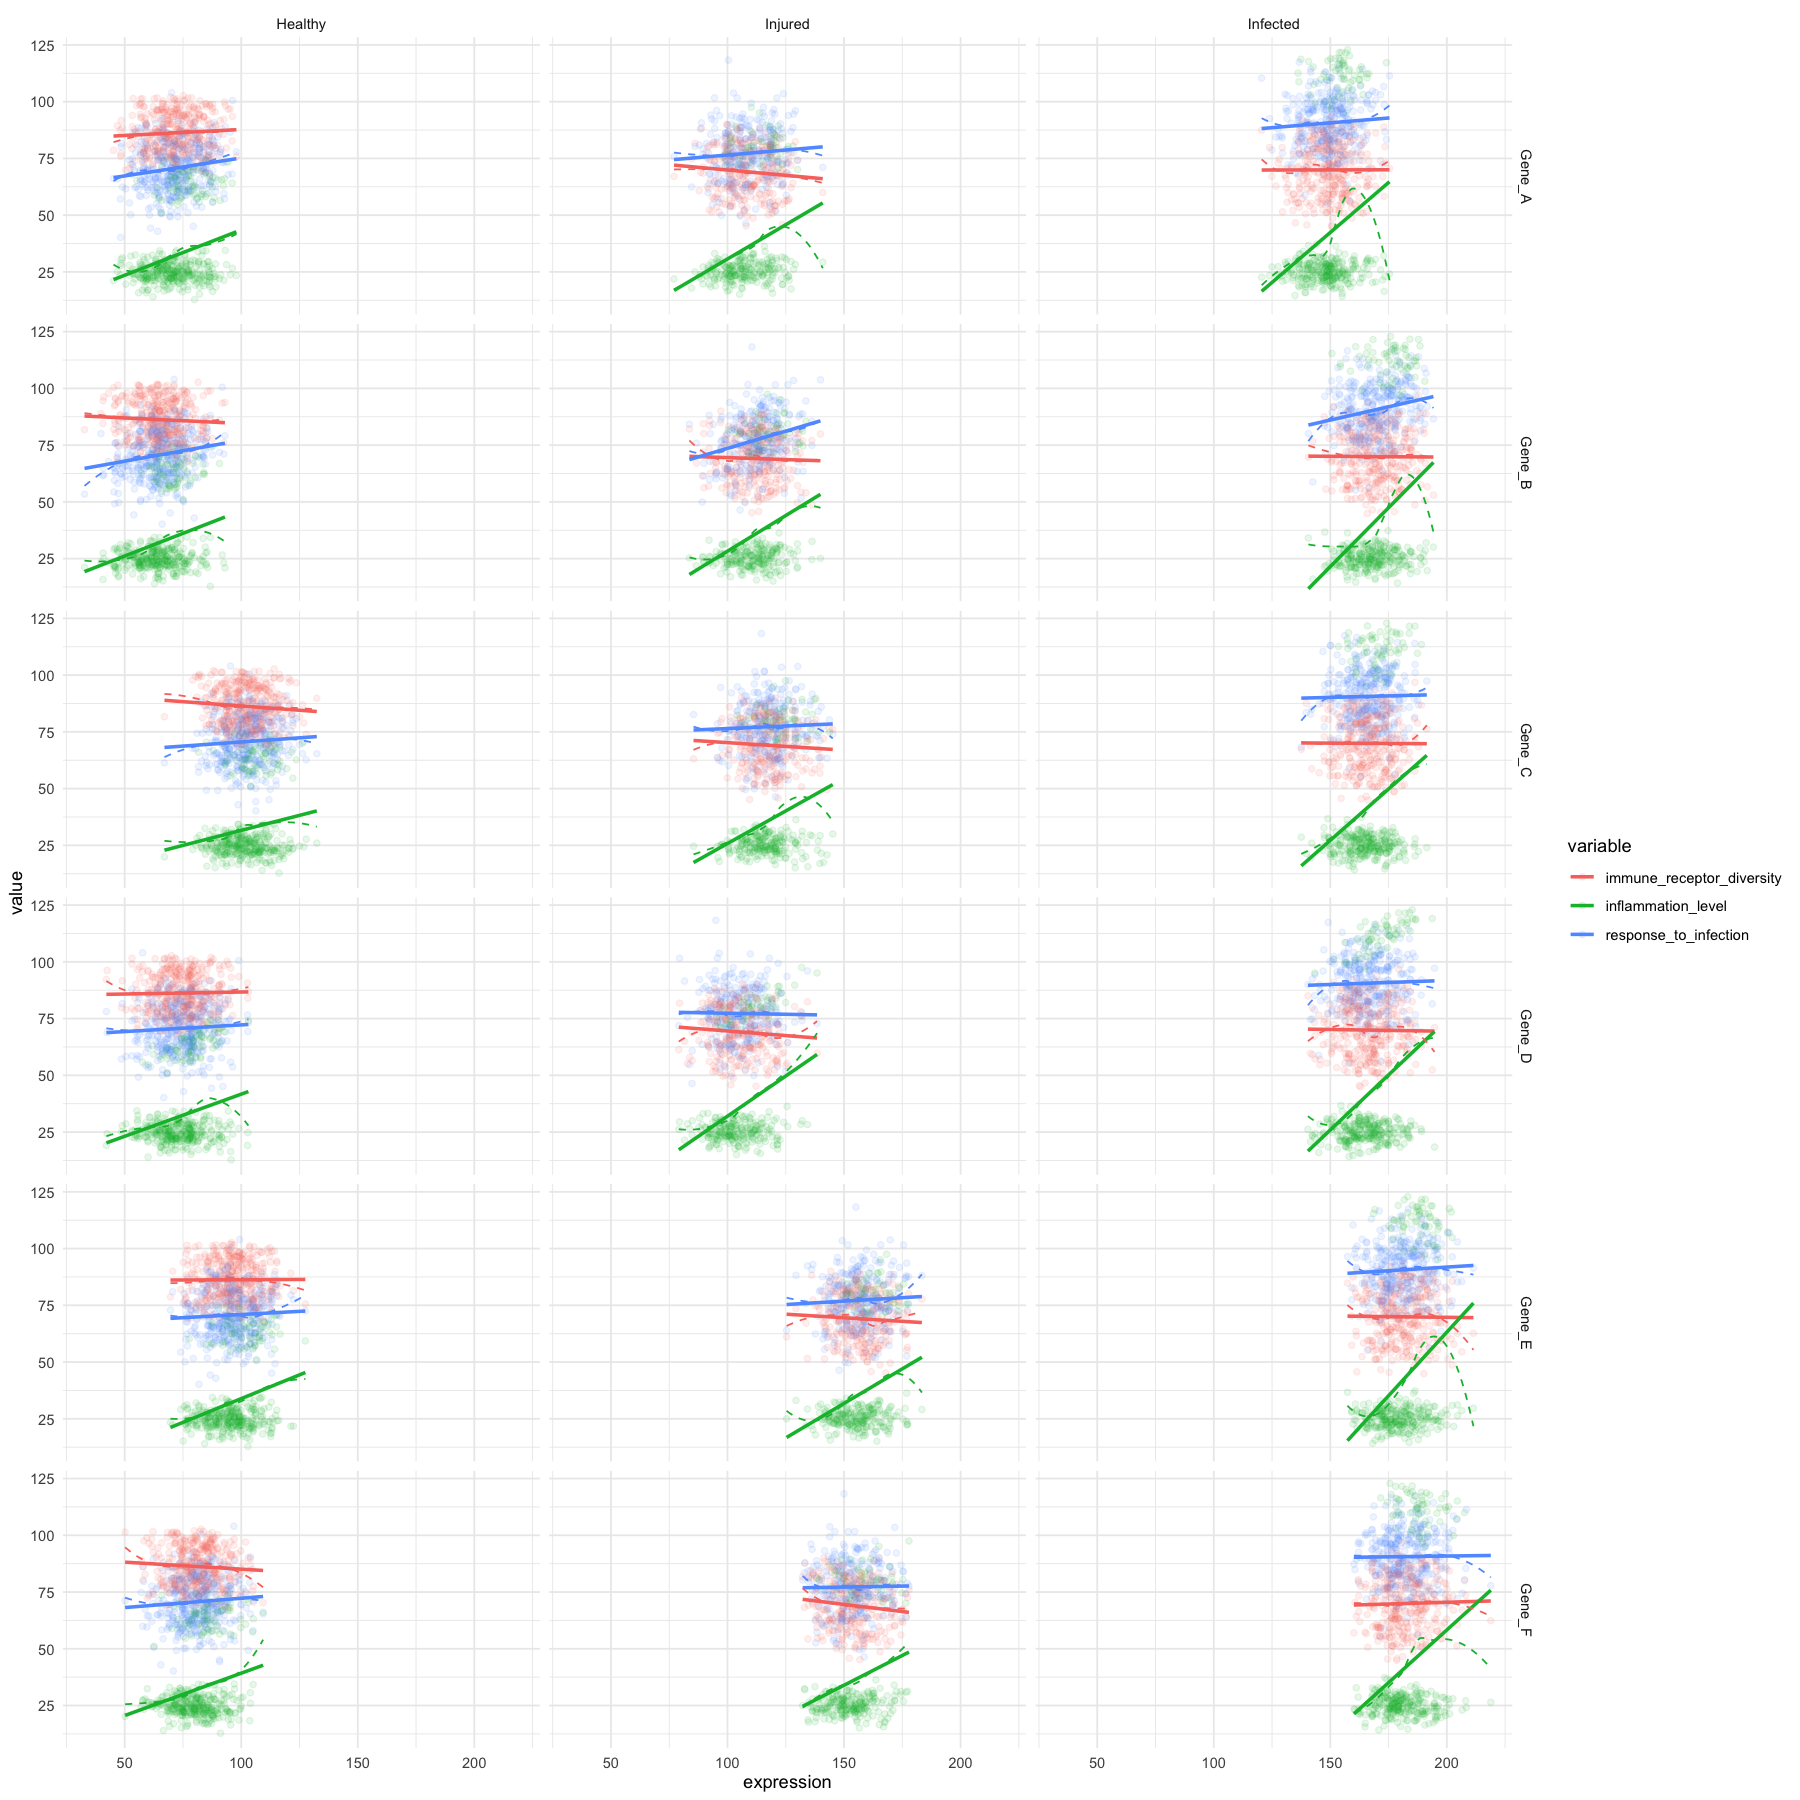

In [ ]:
options(repr.plot.width=15, repr.plot.height=15)
ggplot(aux_long, aes(x=expression, y=value, col=variable)) +
    geom_point(alpha=0.1) +
    geom_smooth(method="lm", formula="y ~ x", se=FALSE) +
    geom_smooth(method="loess", formula="y ~ x", se=FALSE, size=0.5, linetype="dashed") +
    facet_grid(rows=vars(gene), cols=vars(physiological_condition)) +
    theme_minimal()


### Response to Infection

In [ ]:
aux_genes %>%
    group_by(gene) %>%
    summarise(p_value = shapiro.test(response_to_infection)$p.value)

gene   p_value    
1 Gene_A 0.007007245
2 Gene_B 0.007007245
3 Gene_C 0.007007245
4 Gene_D 0.007007245
5 Gene_E 0.007007245
6 Gene_F 0.007007245

The data is not distributed normally.

In [ ]:
aux_genes %>%
    group_by(gene) %>%
    summarise(
        cor_coef = cor.test(expression, response_to_infection, method="spearman")$estimate,
        p_val = cor.test(expression, response_to_infection, method="spearman")$p.value
    )

Warning message:
"There were 12 warnings in `summarise()`.
The first warning was:
i In argument: `cor_coef = cor.test(expression, response_to_infection, method =
  "spearman")$estimate`.
i In group 1: `gene = "Gene_A"`.
Caused by warning in `cor.test.default()`:
! Cannot compute exact p-value with ties
i Run `dplyr::last_dplyr_warnings()` to see the 11 remaining warnings."


gene   cor_coef  p_val        
1 Gene_A 0.6000653  5.687748e-98
2 Gene_B 0.6260607 5.810217e-109
3 Gene_C 0.5683221  7.550983e-86
4 Gene_D 0.5783474  1.557726e-89
5 Gene_E 0.5756870  1.523823e-88
6 Gene_F 0.5782658  1.671139e-89

Moderately strong, statistically significant, positive correlations between all genes and the response to infection.

### Inflammation Level

In [ ]:
aux_genes %>%
    group_by(gene) %>%
    summarise(p_value = shapiro.test(inflammation_level)$p.value)

gene   p_value     
1 Gene_A 5.453906e-41
2 Gene_B 5.453906e-41
3 Gene_C 5.453906e-41
4 Gene_D 5.453906e-41
5 Gene_E 5.453906e-41
6 Gene_F 5.453906e-41

The data is not distributed normally.

In [ ]:
aux_genes %>%
    group_by(gene) %>%
    summarise(
        cor_coef = cor.test(expression, inflammation_level, method="spearman")$estimate,
        p_val = cor.test(expression, inflammation_level, method="spearman")$p.value
    )

Warning message:
"There were 12 warnings in `summarise()`.
The first warning was:
i In argument: `cor_coef = cor.test(expression, inflammation_level, method =
  "spearman")$estimate`.
i In group 1: `gene = "Gene_A"`.
Caused by warning in `cor.test.default()`:
! Cannot compute exact p-value with ties
i Run `dplyr::last_dplyr_warnings()` to see the 11 remaining warnings."


gene   cor_coef  p_val       
1 Gene_A 0.1322920 2.944859e-05
2 Gene_B 0.1381671 1.271323e-05
3 Gene_C 0.1115942 4.322526e-04
4 Gene_D 0.1226623 1.083085e-04
5 Gene_E 0.1407689 8.667406e-06
6 Gene_F 0.1174882 2.099574e-04

Very weak but statistically significant, positive correlations between all genes and the inflammation level.

### Immune Receptor Diversity

In [ ]:
aux_genes %>%
    group_by(gene) %>%
    summarise(p_value = shapiro.test(immune_receptor_diversity)$p.value)

gene   p_value     
1 Gene_A 5.700909e-09
2 Gene_B 5.700909e-09
3 Gene_C 5.700909e-09
4 Gene_D 5.700909e-09
5 Gene_E 5.700909e-09
6 Gene_F 5.700909e-09

The data is not distributed normally.

In [ ]:
aux_genes %>%
    group_by(gene) %>%
    summarise(
        cor_coef = cor.test(expression, immune_receptor_diversity, method="spearman")$estimate,
        p_val = cor.test(expression, immune_receptor_diversity, method="spearman")$p.value
    )

Warning message:
"There were 12 warnings in `summarise()`.
The first warning was:
i In argument: `cor_coef = cor.test(expression, immune_receptor_diversity,
  method = "spearman")$estimate`.
i In group 1: `gene = "Gene_A"`.
Caused by warning in `cor.test.default()`:
! Cannot compute exact p-value with ties
i Run `dplyr::last_dplyr_warnings()` to see the 11 remaining warnings."


gene   cor_coef   p_val       
1 Gene_A -0.5212671 3.915042e-70
2 Gene_B -0.5289664 1.543951e-72
3 Gene_C -0.4726873 2.639656e-56
4 Gene_D -0.5205332 6.586882e-70
5 Gene_E -0.5252157 2.330897e-71
6 Gene_F -0.5315794 2.283266e-73

Moderate, statistically significant, negative correlations between all genes and the immune receptor diversity.

### actually there was no point to you doing any of the following so skip~! and trash

There's no point to check if the gene expressions between each gene in the healthy condition. That's the control and we have to accept that is the baseline profile. 

Rather, it would be interesting to see if the difference in expression level between conditions is significant or not.

In [ ]:
aux_genes = sharks_genes %>%
    filter(physiological_condition %in% c("Healthy", "Injured", "Infected"))

aux_genes %>%
    group_by(gene) %>%
    summarise(p_value = shapiro.test(expression)$p.value)

gene   p_value     
1 Gene_A 2.472763e-20
2 Gene_B 3.754842e-24
3 Gene_C 5.612111e-25
4 Gene_D 3.314823e-25
5 Gene_E 9.703375e-26
6 Gene_F 1.240516e-27

Data is not distributed normally.

In [ ]:
aux_genes %>%
    group_by(gene) %>%
    summarise(
        kruskal_p = kruskal.test(expression ~ physiological_condition)$p.value
    )

gene   kruskal_p    
1 Gene_A 2.565153e-189
2 Gene_B 2.916067e-190
3 Gene_C 3.444647e-169
4 Gene_D 7.983783e-188
5 Gene_E 7.731955e-185
6 Gene_F 1.764790e-187

There is a statistical difference in gene expression between the physiological conditions.

In [ ]:
dunn_res = list()
genes = unique(aux_genes$gene)

for (g in genes) {
    gene_data = aux_genes %>% filter(gene == g)

    dunn_res[[g]] = dunnTest(data=gene_data, expression ~ physiological_condition, method="bonferroni")
}

dunn_res

Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Bonferroni method.


Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Bonferroni method.


Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Bonferroni method.


Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Bonferroni method.


Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Bonferroni method.


Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Bonferroni method.




$Gene_A
          Comparison         Z       P.unadj         P.adj
1 Healthy - Infected -29.41849 3.186302e-190 9.558905e-190
2  Healthy - Injured -14.40969  4.497399e-47  1.349220e-46
3 Infected - Injured  12.92669  3.182282e-38  9.546847e-38

$Gene_B
          Comparison         Z       P.unadj         P.adj
1 Healthy - Infected -29.48842 4.052498e-191 1.215749e-190
2  Healthy - Injured -14.49823  1.243114e-47  3.729343e-47
3 Infected - Injured  12.90486  4.226091e-38  1.267827e-37

$Gene_C
          Comparison         Z       P.unadj         P.adj
1 Healthy - Infected -27.80428 3.850030e-170 1.155009e-169
2  Healthy - Injured -10.65059  1.732544e-26  5.197633e-26
3 Infected - Injured  15.09140  1.844801e-51  5.534403e-51

$Gene_D
          Comparison         Z       P.unadj         P.adj
1 Healthy - Infected -29.31715 6.269598e-189 1.880879e-188
2  Healthy - Injured -14.10582  3.497239e-45  1.049172e-44
3 Infected - Injured  13.12831  2.266531e-39  6.799593e-39

$Gene_E
          Co

The differences are between all physiological conditions for every gene.

We can say that in the case of injury and infection, the expression of each gene increases, meaning that all genes are immunity-linked genes.

In [ ]:
# Initialize a results list
results_list <- list()

genes <- unique(aux_genes$gene)

for(g in genes){
  # Subset gene
  df_gene <- aux_genes %>% filter(gene == g)
  
  # Kruskal-Wallis
  kw <- kruskal.test(expression ~ physiological_condition, data = df_gene)
  
  # Eta-squared (effect size for Kruskal-Wallis)
  H <- kw$statistic
  k <- length(unique(df_gene$physiological_condition))
  n <- nrow(df_gene)
  eta2 <- (H - k + 1)/(n - k)
  
  # Dunn test for pairwise comparisons
  dunn_res <- dunnTest(expression ~ physiological_condition, data = df_gene, method="bonferroni")
  
  # Rank-biserial correlation
  dunn_table <- dunn_res$res %>%
    mutate(r = Z / sqrt(n))
  
  # Save results
  results_list[[g]] <- list(
    Kruskal_p = kw$p.value,
    Eta2 = eta2,
    Dunn = dunn_table
  )
}

variable | value | meaning
:-: | :-: | :-: 
kruskal-wallis | p < 0.05 | at least 1 condition differs
eta^2 | [0:1] | magnitude of overall difference
dunn p-value | ... | which pairs differ significantly
r | ... | difference strength

#### seriously, when are you going stop overthinking and wasting your life; you might as well just end it now

In [ ]:
results_list

$Gene_A
$Gene_A$Kruskal_p
[1] 2.565153e-189

$Gene_A$Eta2
Kruskal-Wallis chi-squared 
                 0.8770173 

$Gene_A$Dunn
          Comparison         Z       P.unadj         P.adj          r
1 Healthy - Infected -29.41849 3.186302e-190 9.558905e-190 -0.9345091
2  Healthy - Injured -14.40969  4.497399e-47  1.349220e-46 -0.4577388
3 Infected - Injured  12.92669  3.182282e-38  9.546847e-38  0.4106298


$Gene_B
$Gene_B$Kruskal_p
[1] 2.916067e-190

$Gene_B$Eta2
Kruskal-Wallis chi-squared 
                 0.8814189 

$Gene_B$Dunn
          Comparison         Z       P.unadj         P.adj          r
1 Healthy - Infected -29.48842 4.052498e-191 1.215749e-190 -0.9367306
2  Healthy - Injured -14.49823  1.243114e-47  3.729343e-47 -0.4605515
3 Infected - Injured  12.90486  4.226091e-38  1.267827e-37  0.4099362


$Gene_C
$Gene_C$Kruskal_p
[1] 3.444647e-169

$Gene_C$Eta2
Kruskal-Wallis chi-squared 
                 0.7831985 

$Gene_C$Dunn
          Comparison         Z       P.unadj         P.adj          r
1 Healthy - Infected -27.80428 3.850030e-170 1.155009e-169 -0.8832322
2  Healthy - Injured -10.65059  1.732544e-26  5.197633e-26 -0.3383273
3 Infected - Injured  15.09140  1.844801e-51  5.534403e-51  0.4793942


$Gene_D
$Gene_D$Kruskal_p
[1] 7.983783e-188

$Gene_D$Eta2
Kruskal-Wallis chi-squared 
                 0.8700579 

$Gene_D$Dunn
          Comparison         Z       P.unadj         P.adj          r
1 Healthy - Infected -29.31715 6.269598e-189 1.880879e-188 -0.9312901
2  Healthy - Injured -14.10582  3.497239e-45  1.049172e-44 -0.4480860
3 Infected - Injured  13.12831  2.266531e-39  6.799593e-39  0.4170346


$Gene_E
$Gene_E$Kruskal_p
[1] 7.731955e-185

$Gene_E$Eta2
Kruskal-Wallis chi-squared 
                 0.8561394 

$Gene_E$Dunn
          Comparison         Z       P.unadj         P.adj          r
1 Healthy - Infected -28.99142 8.439642e-185 2.531893e-184 -0.9209429
2  Healthy - Injured -15.09453  1.759308e-51  5.277925e-51 -0.4794936
3 Infected - Injured  11.87344  1.626326e-32  4.878978e-32  0.3771724


$Gene_F
$Gene_F$Kruskal_p
[1] 1.76479e-187

$Gene_F$Eta2
Kruskal-Wallis chi-squared 
                 0.8684522 

$Gene_F$Dunn
          Comparison         Z       P.unadj         P.adj          r
1 Healthy - Infected -29.23775 6.427706e-188 1.928312e-187 -0.9287677
2  Healthy - Injured -14.80932  1.275188e-49  3.825564e-49 -0.4704336
3 Infected - Injured  12.37463  3.585247e-35  1.075574e-34  0.3930932

The magnitude of the r values reflect the boxplots.

Gene C has abnormal r values. It has the smallest r value for the healthy-infected comparison its infected-injured r value is greater than its healthy-injured comparison.

Genes E and F have smallest r values for the infected-injured comparison.

Does the differences in r value mean anything? Are you drowning yourself in another rabbit hole?

# คิดมากอีกแล้ว 

#### oops, genes

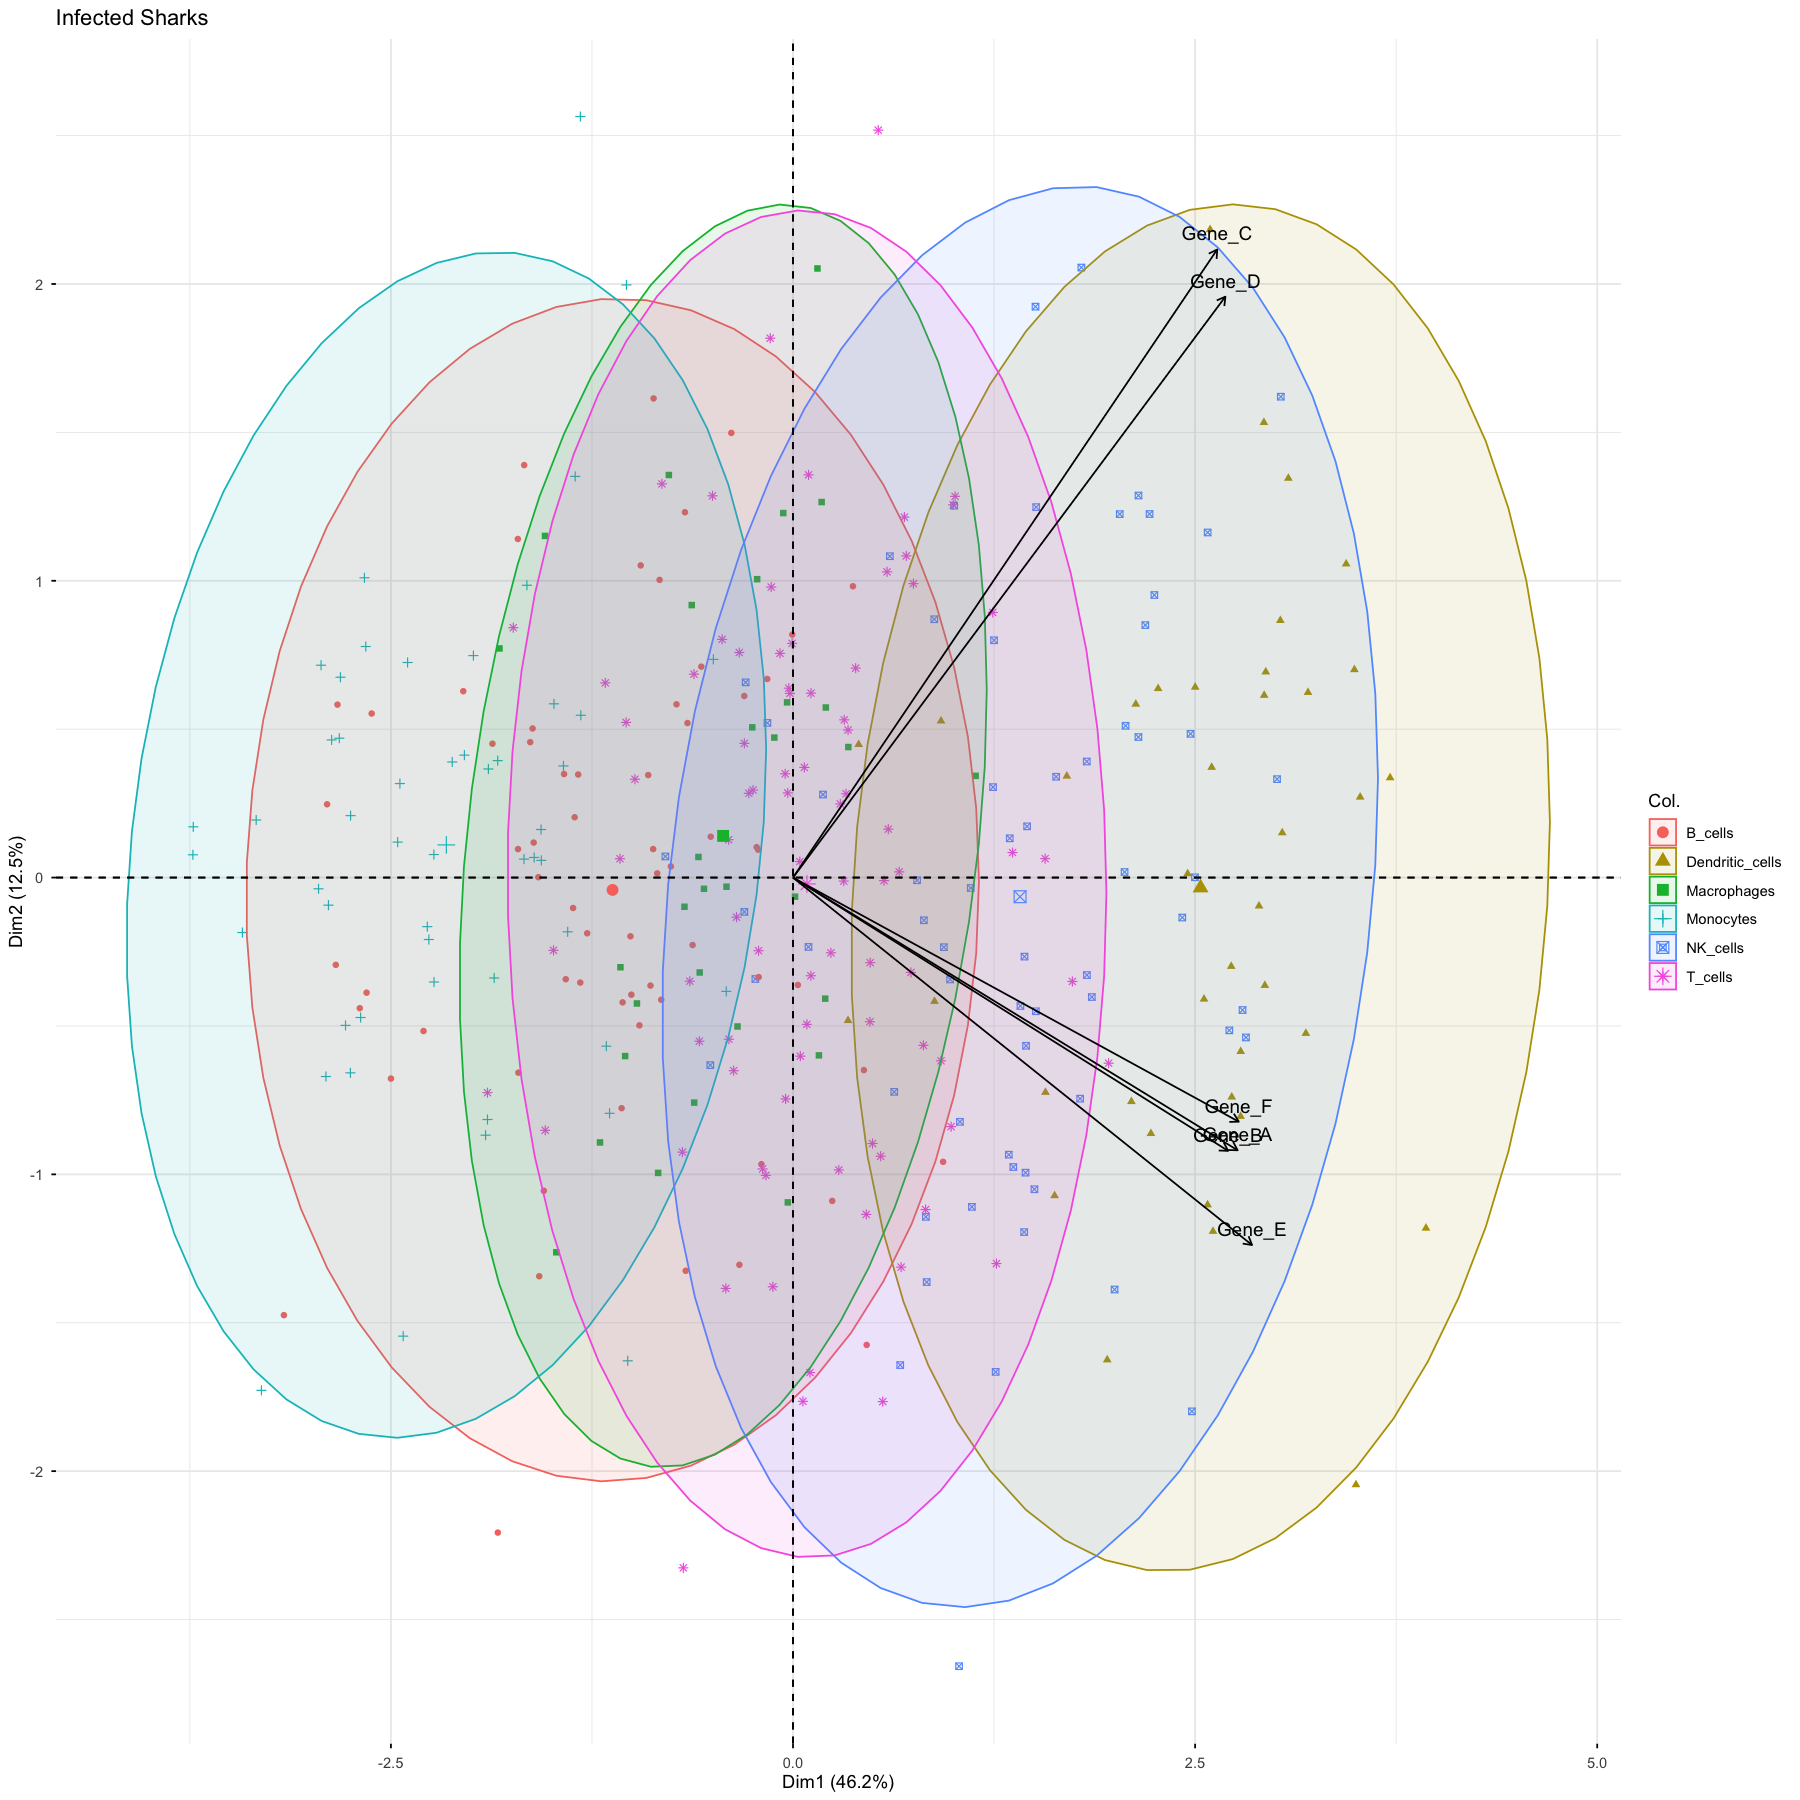

In [ ]:
# infected sharks only
infected_sharks = condition_data(sharks, "Infected")

# PCA on infected sharks only
infect_pca <- PCA(infected_sharks[,4:9], scale.unit = TRUE, graph = FALSE)

# MDS cloud plot with correlation circle
fviz_pca_biplot(infect_pca, geom.ind="point", col.ind=infected_sharks$immune_cell_type, col.var="black", addEllipses=TRUE, title="Infected Sharks") 

Dendritic cells and NK cells are mainly responsible for overall gene expression. (Interestingly, it looks like the T-cell population is in the middle?)

There are two groups of genes that seem to correlate together: C and D; A, B, E, and F.

Perhaps, this indicates that there are 2 types of responses?

Maybe see what metrics seem to be influenced by each group of gene's expressions for dendritic and NK cells?

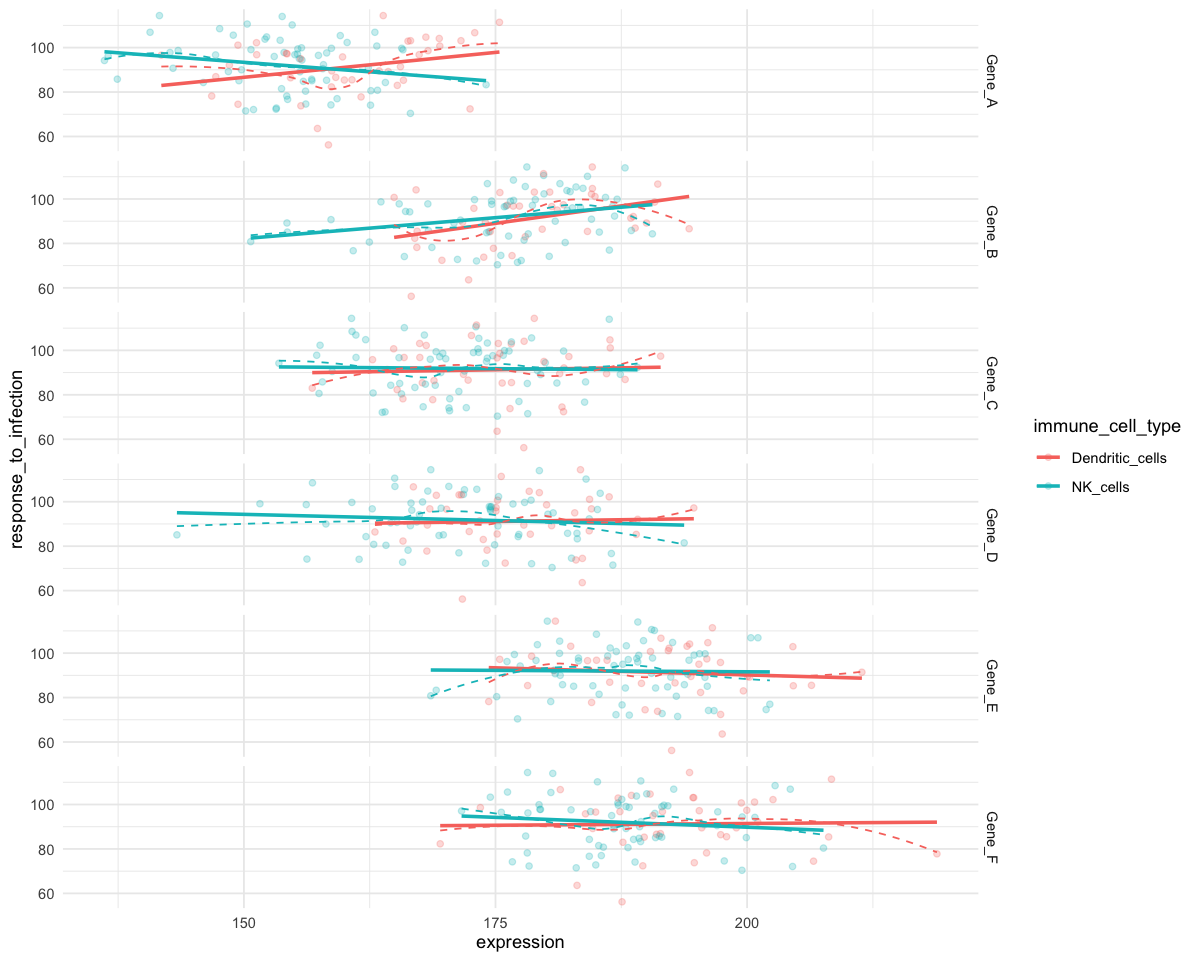

In [ ]:
infect_genes = condition_data(sharks_genes, "Infected")
infect_DC_NK_genes = infect_genes %>% 
    filter(immune_cell_type %in% c("Dendritic_cells", "NK_cells"))

options(repr.plot.width=10, repr.plot.height=8)
ggplot(infect_DC_NK_genes, aes(x=expression, y=response_to_infection, col=immune_cell_type)) +
    geom_point(alpha=0.25) +
    geom_smooth(method="lm", formula="y ~ x", se=FALSE) +
    geom_smooth(method="loess", formula="y ~ x", se=FALSE, size=0.5, linetype="dashed") +
    facet_grid(rows=vars(gene)) +
    theme_minimal()

#### ignore

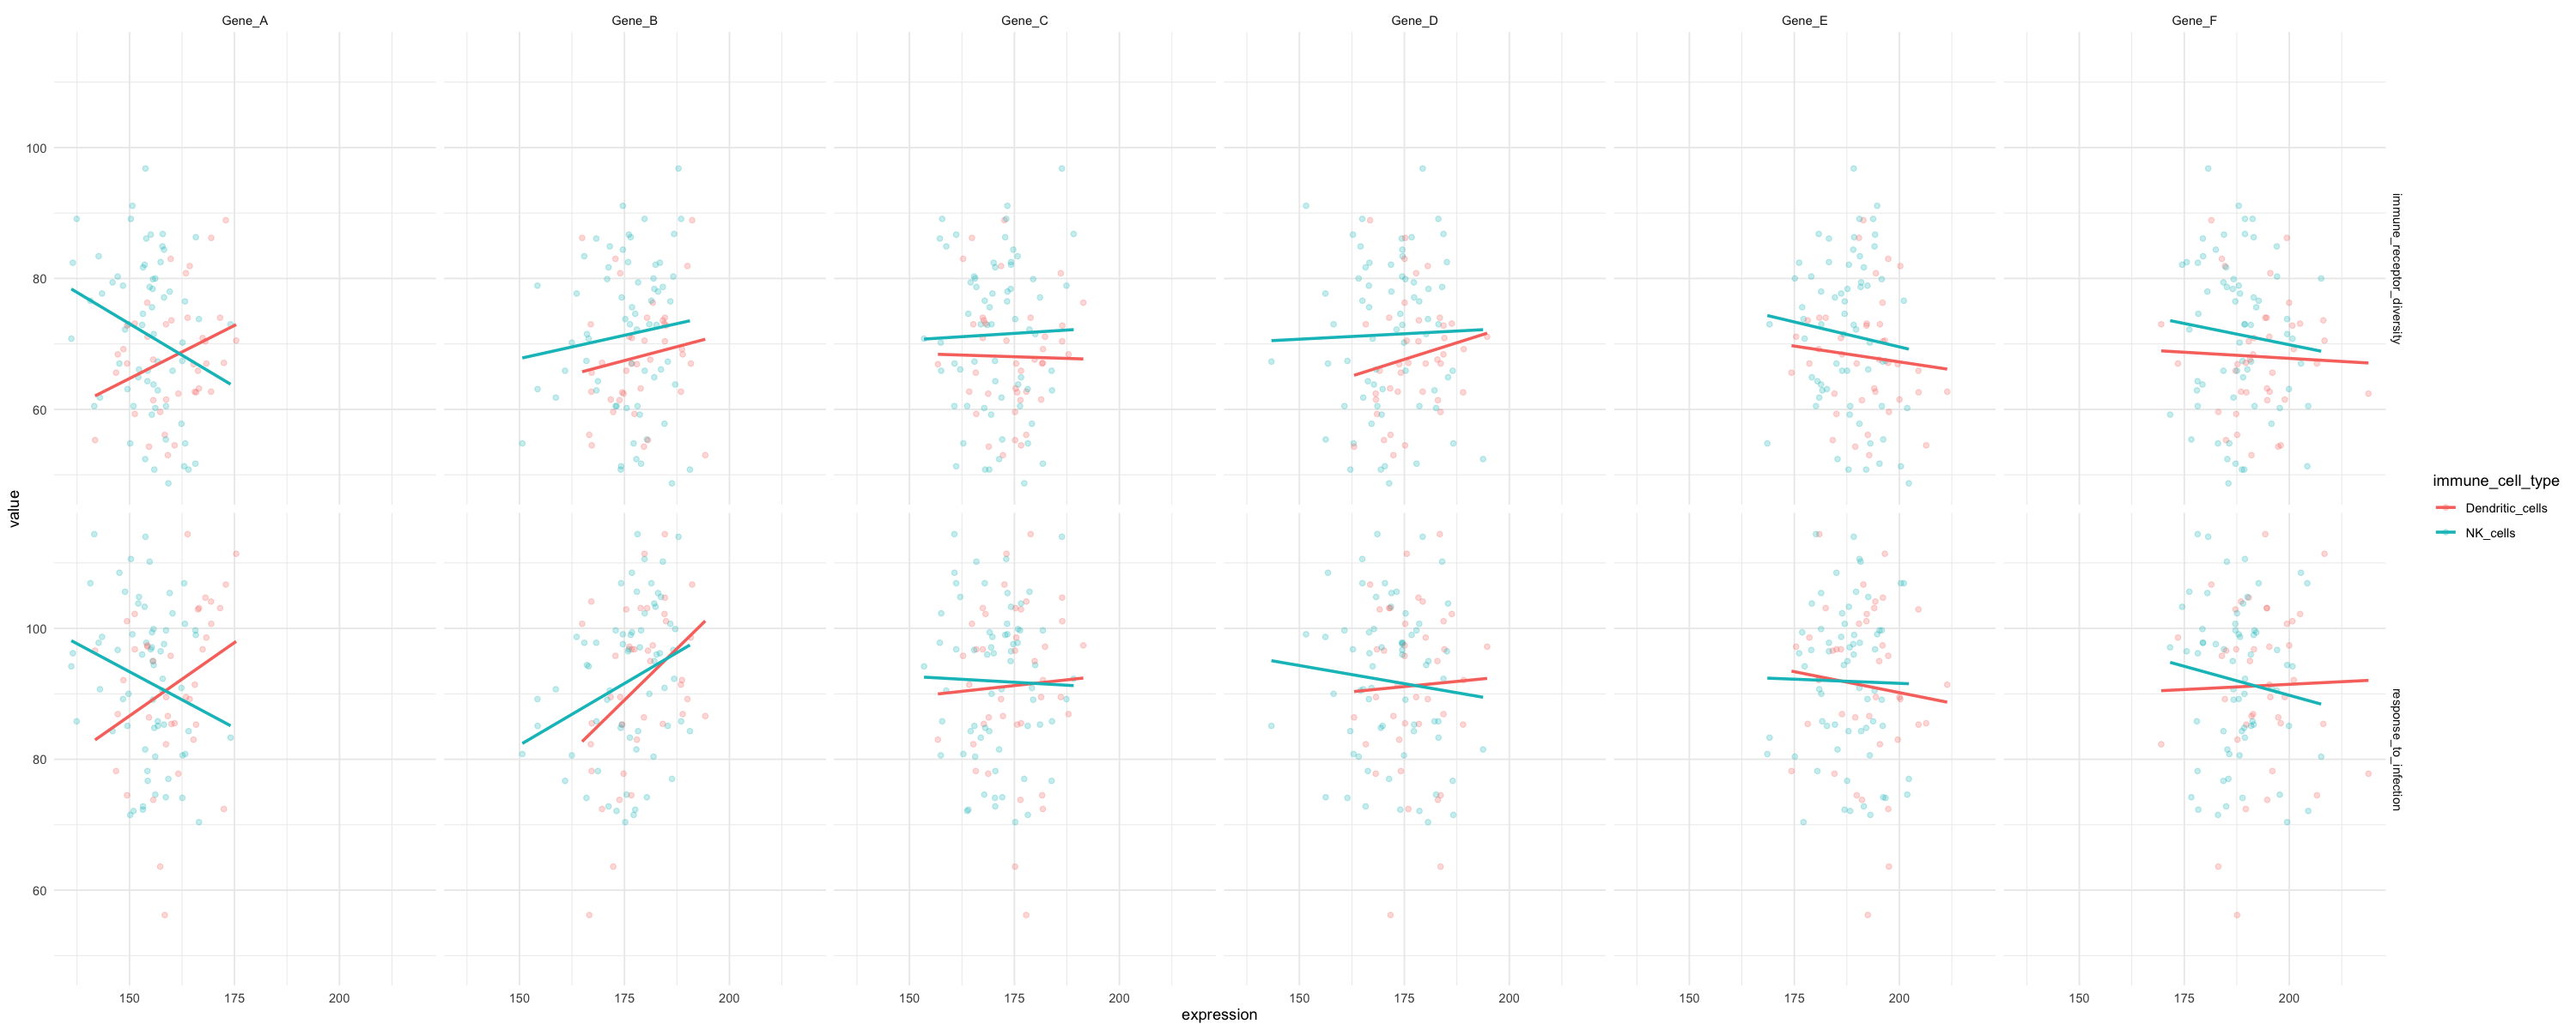

In [ ]:
infect_DC_NK_immune = condition_data(sharks_super_long, "Infected") %>%
  filter(immune_cell_type %in% c("Dendritic_cells", "NK_cells")) %>%
  filter(variable %in% c("response_to_infection", "immune_receptor_diversity"))

options(repr.plot.width=25, repr.plot.height=10)
ggplot(infect_DC_NK_immune, aes(x=expression, y=value, col=immune_cell_type)) +
    geom_point(alpha=0.25) +
    geom_smooth(method="lm", formula="y ~ x", se=FALSE) +
    facet_grid(rows=vars(variable), cols=vars(gene)) +
    theme_minimal()

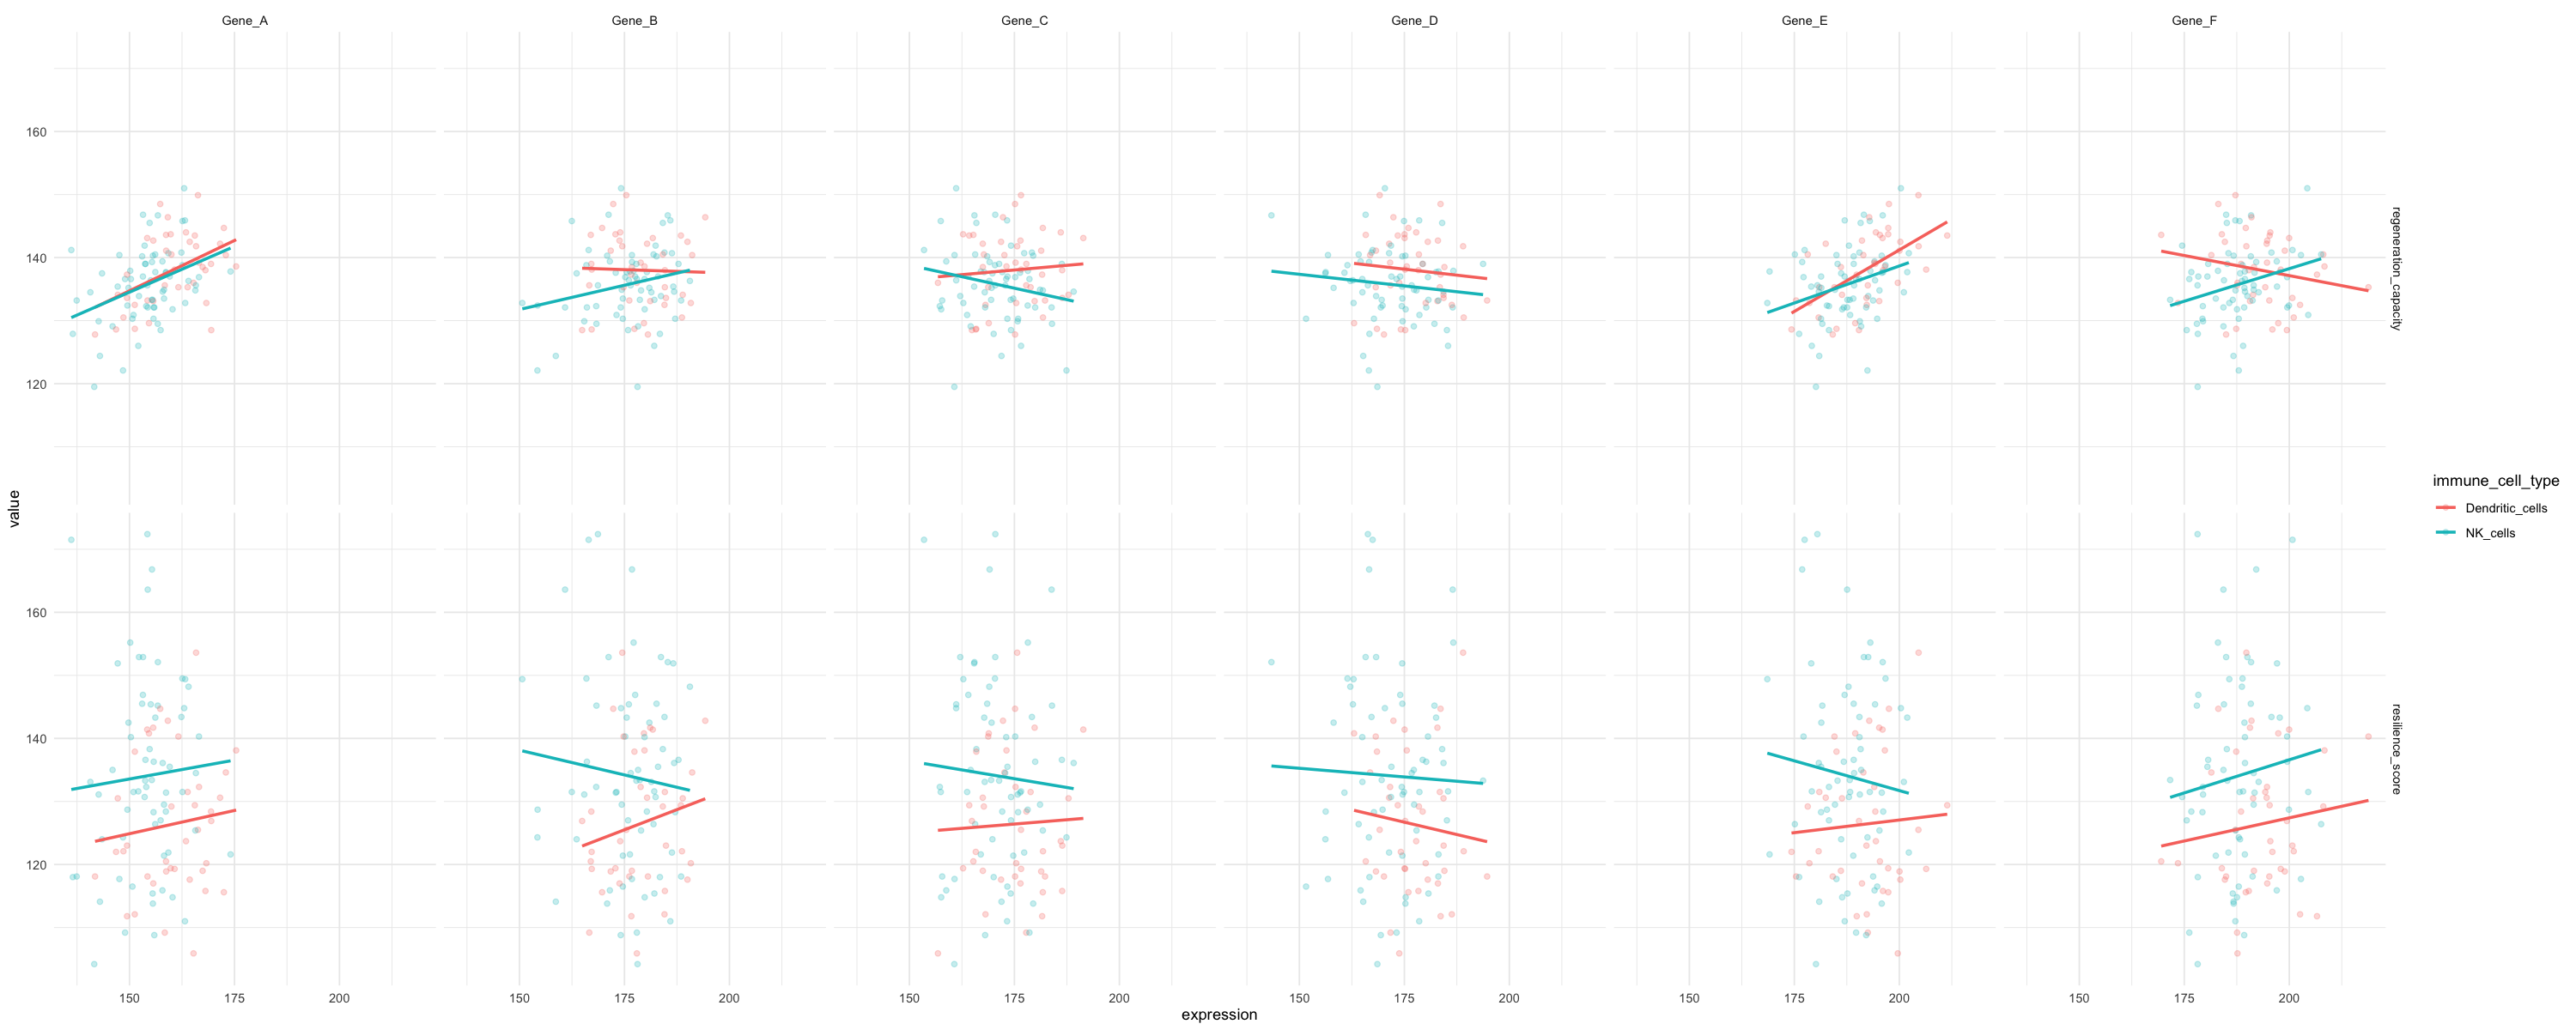

In [ ]:
infect_DC_NK_revit = condition_data(sharks_super_long, "Infected") %>%
  filter(immune_cell_type %in% c("Dendritic_cells", "NK_cells")) %>%
  filter(variable %in% c("resilience_score", "regeneration_capacity"))

options(repr.plot.width=25, repr.plot.height=10)
ggplot(infect_DC_NK_revit, aes(x=expression, y=value, col=immune_cell_type)) +
    geom_point(alpha=0.25) +
    geom_smooth(method="lm", formula="y ~ x", se=FALSE) +
    facet_grid(rows=vars(variable), cols=vars(gene)) +
    theme_minimal()